In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [5]:
def create_rolling_features(data: pd.DataFrame, K: int):
    x, y = [], []
    for i in range(len(data) - K):
        features = data.iloc[i:i+K].drop(columns=['Anomaly']).values.flatten()
        label = data.iloc[i+K]['Anomaly']
        x.append(features)
        y.append(label)
    return np.array(x), np.array(y)

def pre_process(file_path: str):
    data = pd.read_csv(file_path)
    data['time'] = pd.to_datetime(data['time'])
    data['time'] = data['time'].astype(int) // 10**9
    x, y = create_rolling_features(data, K=3)
    return x, y

In [6]:
file_path = "./data/data.csv"
random_state = 0
test_size = 0.2

In [7]:
x, y = pre_process(file_path)
smote = SMOTE(random_state=random_state)
x, y = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
del x, y, smote, scaler

In [8]:
model = RandomForestClassifier(random_state=random_state)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

              precision    recall  f1-score   support

       False       1.00      0.99      0.99       242
        True       0.99      1.00      0.99       235

    accuracy                           0.99       477
   macro avg       0.99      0.99      0.99       477
weighted avg       0.99      0.99      0.99       477



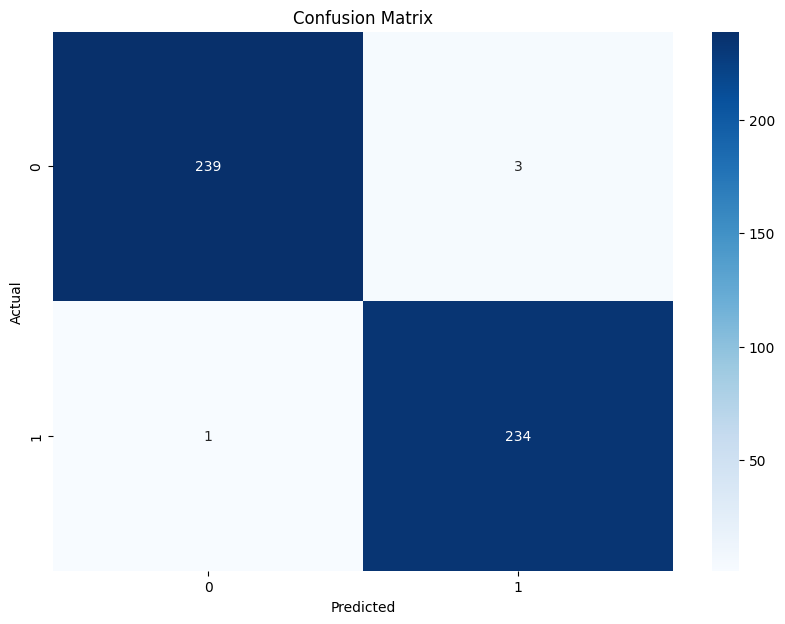

In [9]:
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()